# Case Neoway - Regressor Baseline

In [1]:
import os, sys

sys.path.append('../')
os.chdir('../')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from src.base.commons import load_yaml,load_json, load_pickle
from src.base.logger import logging
from src.global_variables import FEATURE_PARAMETERS_FILE, FILEPATHS_FILE, PARAMETERS_FILE, MODEL_CONFIG_FILE

from src.model import preprocessing, data


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [18]:
# !pip install shap
import shap

In [4]:
%config IPCompleter.use_jedi=False

pd.options.display.max_columns = None

In [8]:
%pwd

'/media/risknow/SSD-M2/GitHub/case-neoway'

In [10]:
#Importando modelo
model = load_pickle('model/lightgbm/regressor.pickle')

In [20]:
X_train_transf = pd.read_parquet('data/processed/X_train_transf.parquet')
X_validation_transf = pd.read_parquet('data/processed/X_validation_transf.parquet')

In [55]:
%%time
X_temp = X_validation_transf.sample(10000)

# Fits the explainer
explainer = shap.Explainer(model.predict, X_temp)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_temp)

Permutation explainer: 10001it [16:58,  9.69it/s]                           


CPU times: user 1h 4min 49s, sys: 6.02 s, total: 1h 4min 55s
Wall time: 16min 58s


In [56]:
pd.DataFrame({'feature': X_temp.columns,'importance':model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
4,grau_familia,332
31,V1_transporte_mais_utilizado_particular,318
33,V2_transporte_mais_utilizado_particular,277
30,V1_transporte_mais_utilizado_publico,272
29,V1_estado_civil_solteiro,271
28,V1_estado_civil_caso_ou_divorciado,243
2,V1_pratica_esportes,234
6,proximidade_visita_casual,226
5,proximidade_visita_frequente,170
32,V2_transporte_mais_utilizado_publico,161


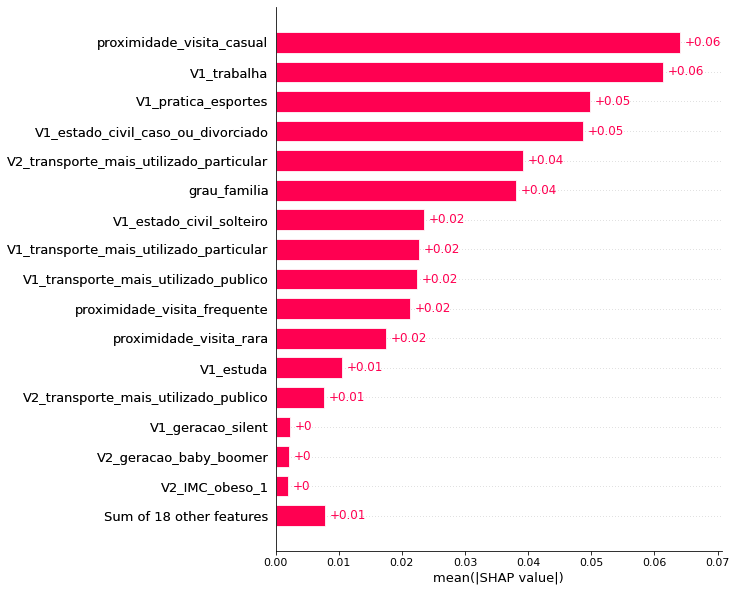

In [65]:
shap.plots.bar(shap_values, max_display=17)

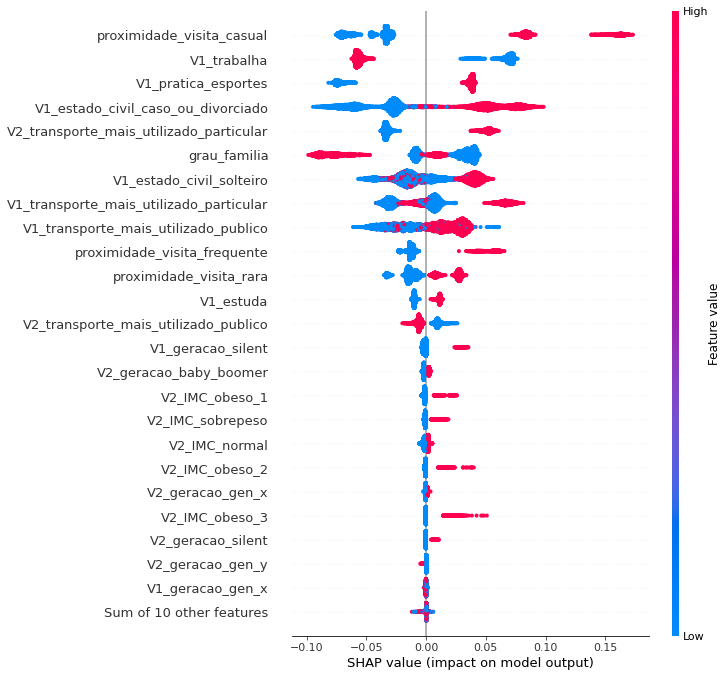

In [61]:
shap.plots.beeswarm(shap_values, max_display=25)